In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import csv

def data_by_country(countries=["Germany"], filepath_csv="/Users/isabelladick/Downloads/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"):
    """
    This function return a dictionary with countries as keys and a
    numpy array of the respective numbers over time as values. Where
    several states or provinces exist, provinces are returned
    individually.
    
    Args:  countries:    A list of the desired countries (strings)
           filepath_csv: Path to csv with data
           
    Returns: Dictionary
    """
    with open(filepath_csv, 'r') as f:
        reader = csv.reader(f, delimiter=',')
        headers = next(reader)
        mydata = np.array(list(reader))

    return_dict = {}
    for i in range(mydata.shape[0]):
        if mydata[i,0] == "":
            if mydata[i, 1] in countries:
                return_dict[mydata[i, 1]] = mydata[i, 4:].astype(int)

        else:
            if mydata[i, 1] in countries:
                return_dict[mydata[i, 0]] = mydata[i, 4:].astype(int)

    return return_dict

def total_of_country(countries=["Germany"]):
    """
    This function returns a total for the desired countries. See data_by_country().
    If only one country is enquired, we return an array, not a dictionary.
    """
    init = 0
    
    if len(countries) == 1:
        data_dict = data_by_country(countries)
        for key in list(data_dict.keys()):
            if init == 0:
                values_array = np.array([data_dict[key]])
                init = 1
            
            else:
                values_array = np.append(values_array, [data_dict[key]], axis = 0)
            
        return np.sum(values_array, axis = 0)
    
    else:
        return_dict = {}
        for country in countries:
            data_dict = data_by_country(country)
            init = 0
            
            for key in list(data_dict.keys()):
                if init == 0:
                    values_array = np.array([data_dict[key]])
                    init = 1
            
                else:
                    values_array = np.append(values_array, [data_dict[key]], axis = 0)
            
            return_dict[country] = np.sum(values_array, axis = 0)
            
        return return_dict



In [101]:
print(total_of_country(["China","Germany","Italy"]))

{'China \n': array([  548,   643,   920,  1406,  2075,  2877,  5509,  6087,  8141,
        9802, 11891, 16630, 19716, 23707, 27440, 30587, 34110, 36814,
       39829, 42354, 44386, 44759, 59895, 66358, 68413, 70513, 72434,
       74211, 74619, 75077, 75550, 77001, 77022, 77241, 77754, 78166,
       78600, 78928, 79356, 79932, 80136, 80261, 80386, 80537, 80690,
       80770, 80823, 80860, 80887, 80921, 80932, 80945, 80977, 81003,
       81033, 81058, 81102, 81156, 81250, 81305]), 'Germany': array([    0,     0,     0,     0,     0,     1,     4,     4,     4,
           5,     8,    10,    12,    12,    12,    12,    13,    13,
          14,    14,    16,    16,    16,    16,    16,    16,    16,
          16,    16,    16,    16,    16,    16,    16,    17,    27,
          46,    48,    79,   130,   159,   196,   262,   482,   670,
         799,  1040,  1176,  1457,  1908,  2078,  3675,  4585,  5795,
        7272,  9257, 12327, 15320, 19848, 22213]), 'Italy': array([    0,     0,     


Intensiv-Betten in Deutschland:
 28e3

Maximal gleichzeitig zulässig Infizierte in Deutschland: 1.4 Mio

Dauer bis Deutschland durchseucht: 1.6046966731898238 Jahre


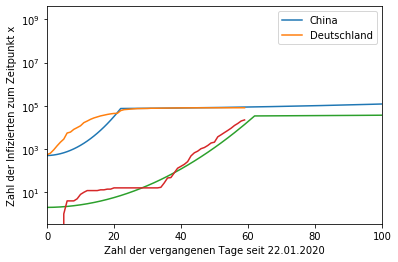

In [220]:

s = (7*4*6)+1 # betrachtete Zeitspanne in Tagen#
ss = 900 
s_uncontrolled_china = 18+5
s_uncontrolled_italy = 20+10
s_uncontrolled_ger = 53+10
days = len(data_by_country()["Germany"])
#days_china = len(data_by_country()["China"])
#days_italy = len(data_by_country()["Italy"])
data = total_of_country(["China", "Italy", "Germany"])

d = np.arange(0,s)
d_china = np.arange(0,ss)
d_italy = np.arange(0,s_uncontrolled_italy)
d_ger = np.arange(0,ss)
N = np.zeros(ss)
N_china = np.zeros(ss)
N_italy = np.zeros(s_uncontrolled_italy)
N_ger = np.zeros(ss)
N_immun = np.zeros(s)
A = np.zeros(s)
A_china = np.zeros(ss)
A_italy = np.zeros(s_uncontrolled_italy)
A_ger = np.zeros(ss)
Nc = np.zeros(s)
Ac = np.zeros(s)
A_immun = np.zeros(s)


N[0] = 2000  # Anfangsfälle
N_china[0] = 500  # Anfangsfälle
N_italy[0] = 1  # Anfangsfälle
N_ger[0] = 2  # Anfangsfälle
Nc[0] = 2000
g = 82e6    # Gesamtbevölkerung Deutschland
g_ger = 82e6    # Gesamtbevölkerung Deutschland
g_china = 1386000000 # Gesamtbevölkerung  China
g_italy = 60480000 # Gesamtbevölkerung  Italien
k = 3.8			# Kontaktpersonen pro Tag
kc = 1.7			# Kontaktpersonen controlled (Ausgangssperre)
i = 0.001		# Infektionswahrscheinlichkeit
ic = 0.0007 # Infektionswahrscheinlichkeit controlled (Hände waschen etc.)
R_0 = 1.9 # Zwischen 1.9 und 3.9 laut https://en.wikipedia.org/wiki/Basic_reproduction_number
N_immun[0] = N[0]
g_immun = (1-1/R_0) * g
f_china = 0.02
f_italy= 0.003
f_ger= 0.005
ji=0

#for j in range(1,s):
#	# Unkontrollierte Ausbreitung:
#	E = 1 + i * k * (1 - N[j-1]/g) 
#	N[j] = N[j-1] * E ** d[j]
#	A[j] = N[j] - N[j-1] * E ** (d[j]-14)
	# Eingedämmte Ausbreitung (controlled)
#	Ec = 1 + ic * kc * (1 - Nc[j-1]/g)
#	Nc[j] = Nc[j-1] * Ec ** d[j]
#	Ac[j] = Nc[j] - Nc[j-1] * Ec ** (d[j]-14)
    # Eingedämmte Ausbreitung und Immunitätskorrektur
#	E = 1 + i * k * (1 - N_immun[j-1]/g_immun) 
#	N_immun[j] = N_immun[j-1] * E ** d[j]
#	A_immun[j] = N_immun[j] - N_immun[j-1] * E ** (d[j]-14)
for jj in range(1,ss):
    
    if jj < s_uncontrolled_china:
      #Unkontrollierte Ausbreitung China:
        f_china = 0.02
        
    else:
     # Kontrollierte Ausbreitung China:
        f_china = 0.0001
        
    E_china = 1 + f_china * (1 - N_china[jj-1]/g_china) 
    N_china[jj] = N_china[jj-1] * E_china ** d_china[jj]
    A_china[jj] = N_china[jj] - N_china[jj-1] * E_china ** (d_china[jj]-14)
    

#for jjj in range(1,ss):  
#	# Unkontrollierte Ausbreitung Italien:
#	E_italy = 1 + f_italy* (1 - N_italy[jjj-1]/g_italy) 
#	N_italy[jjj] = N_italy[jjj-1] * E_italy ** d_italy[jjj]
#	A_italy[jjj] = N_italy[jjj] - N_italy[jjj-1] * E_italy ** (d_italy[jjj]-14)
for jjjj in range(1,ss):  
    
    if jjjj < s_uncontrolled_ger:
      #Unkontrollierte Ausbreitung Ger:
        f_ger = 0.005
        
    else:
     # Kontrollierte Ausbreitung Ger:
        f_ger = 0.005*0.005
        
    E_ger = 1 + f_ger* (1 - N_ger[jjjj-1]/g_ger) 
    N_ger[jjjj] = N_ger[jjjj-1] * E_ger ** d_ger[jjjj]
    A_ger[jjjj] = N_ger[jjjj] - N_ger[jjjj-1] * E_ger ** (d_ger[jjjj]-14)
    
h = 0.04 #3% bis 5% Anzahl der Fälle, die medizinische Betreuung benötigen
A = A * h
Ac = Ac * h
A_immun = A_immun * h

zI= 28000/0.02/1000000
dD = g_ger/(zI*1000000)/365*10

plt.plot(d_china,N_china,  range(days), data["China"],d_ger,N_ger,range(days), data["Germany"])#,d_italy,N_italy,  range(days), data["Italy"],d_ger,N_ger,range(days), data["Germany"]) # , range(days), data["Italy"] d_italy,A_italy, d-55,Ac, d-55, A_immun,
#plt.legend(['Vergleich China','Echtdaten China','Vergleich Deutschalnd','Echtdaten Deutschland']) #,'controlled','immun'
#plt.plot(d_china,A_china,d_ger,A_ger)
plt.legend(['China','Deutschland'])
#print("Max active hospital cases: \n",round(max(A)/1000,3), "e3")
#print("\nMax active hospital cases contr.: \n",round(max(Ac)/1000,3), "e3")
print("\nIntensiv-Betten in Deutschland:\n 28e3")
print("\nMaximal gleichzeitig zulässig Infizierte in Deutschland:",zI, "Mio")
print("\nDauer bis Deutschland durchseucht:",dD, "Jahre")
plt.yscale('log') #log / linear
plt.xlim(0, 100) 
#plt.ylim(500, 10000) 
plt.ylabel("Zahl der Infizierten zum Zeitpunkt x")
plt.xlabel("Zahl der vergangenen Tage seit 22.01.2020")
plt.show()
